In [1]:
# Import packages

from scipy.interpolate import interp1d
import time
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
get_ipython().run_line_magic('matplotlib', 'inline')
import datetime
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as plticker
import bisect
import copy
import json
import csv
import ast
import pylab as pl
import time
from scipy import integrate
from scipy.integrate import quad, dblquad

c0 = (0.76, 0.76, 0.76)
c1 = (1.00, 0.18, 0.33);
c2 = (1.00, 0.23, 0.19);
c3 = (1.00, 0.58, 0.00);
c4 = (1.00, 0.80, 0.00);
c5 = (0.30, 0.85, 0.39);
c6 = (0.35, 0.78, 0.98);
c7 = (0.20, 0.67, 0.86);
c8 = (0.00, 0.48, 1.00);
c9 = (0.35, 0.34, 0.84);
c10 = (0.00, 0.31, 0.57);
c11 = (0.12, 0.29, 0.69);
c12 = (0.17, 0.17, 0.42);
c13 = (1.00, 1.00, 1.00);
c14 = (0.77, 0.04, 0.00);

hitchhiker_color=c3

ios_colors=[c5, c1, c3, c7, c2, c6, c4, c9, c8]

def to_rgb_frac(vect):
    return (float(vect[0])/255, float(vect[1])/255, float(vect[2])/255)

color_list=list(map(to_rgb_frac, [(166,206,227),(178,223,138),(51,160,44),(31,120,180)]))


def to_rgb_frac(vect):
    return (float(vect[0])/255, float(vect[1])/255, float(vect[2])/255)

rb_div_5=list(map(to_rgb_frac, [(202,0,32),
(244,165,130),
(247,247,247),
(146,197,222),
(5,113,176)]))

qualitative_10=list(map(to_rgb_frac, [(166,206,227),
(31,120,180),
(178,223,138),
(51,160,44),
(251,154,153),
(227,26,28),
(253,191,111),
(255,127,0),
(202,178,214),
(106,61,154)]))

#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'


# Import data

In [3]:
#  single cell level
Lee_Six_et_al_data='Shearwater_calls_FDR0.95_all_muts.csv'
cell_dict={}
mutation_dict={}
NA_count_per_row={}
mut_VAF={}
row_count=0

with open(Lee_Six_et_al_data) as data:
    reader = csv.reader(data,delimiter=',')

    next(reader, None)   #skips header
    for row in reader:
        row_count = row_count + 1
        num_NA_in_row = 0
        count=float(row[144])
        mutation_dict[row_count]=count
        
        for i in range(141):
            mut_presence= str(row[4+i])
            if mut_presence == 'NA':
                num_NA_in_row = num_NA_in_row + 1
            
            if i in cell_dict.keys():
#                 print('hey')
                mut_presence_list=cell_dict[i]
                mut_presence_list.append(mut_presence)

                cell_dict[i]=mut_presence_list
                
            else:
                cell_dict[i]=[mut_presence]
                
        NA_count_per_row[row_count] = num_NA_in_row
        mut_VAF[row_count] = count /(141 - num_NA_in_row)/2

list_of_mut_VAF = list(mut_VAF.values())

num_mutations_this_cell_list=[]      
num_undetermined_mut_status_list=[]
for i in range(141):
    num_mutations_this_cell=0
    num_undetermined_mut_status=0
    mut_presence_list = cell_dict[i]
#     print(len(mut_presence_list))
    for m in mut_presence_list:
        if m=='NA':
            num_undetermined_mut_status = num_undetermined_mut_status + 1
        else:
            num_mutations_this_cell = num_mutations_this_cell + int(m)
#     print(num_mutations_this_cell)
    num_mutations_this_cell_list.append(num_mutations_this_cell)
    num_undetermined_mut_status_list.append(int(num_undetermined_mut_status))
    
print('The average number of mutations in each cell is', np.mean(num_mutations_this_cell_list))
print('The list of number of undetermined positions per cell is', num_undetermined_mut_status_list,'out of > 130,000 positions')

The average number of mutations in each cell is 2073.4609929078015
The list of number of undetermined positions per cell is [1269, 12, 79, 14, 223, 810, 28, 182, 931, 3919, 155, 138, 777, 226, 301, 1013, 7204, 2207, 6215, 30, 2114, 367, 285, 1185, 328, 15689, 377, 23, 256, 9, 57, 2009, 54, 164, 14, 851, 9, 1381, 2199, 95, 347, 150, 9, 241, 39, 1742, 108, 191, 135, 48, 4, 196, 859, 2679, 1398, 477, 236, 50, 279, 60, 159, 87, 11, 317, 70, 40, 92, 1951, 1049, 20, 329, 154, 318, 148, 36, 3287, 191, 372, 198, 58, 395, 258, 55, 159, 140, 227, 237, 471, 8059, 6, 446, 206, 1585, 109, 1831, 108, 60, 52, 302, 240, 134, 22, 1214, 71, 67, 20, 751, 194, 42, 959, 204, 60, 961, 355, 630, 36, 174, 176, 1100, 456, 125, 107, 860, 4612, 131, 363, 401, 46, 259, 122, 67, 398, 153, 141, 653, 80, 116, 150, 416, 261, 0] out of > 130,000 positions


# Import functions

In [16]:
# define plotting functions

def error_bars(hist, normed_value, widths):
    
    errors={}
    n=0
    for i in list(hist):
        normalised_hist = i/(normed_value*widths)
        log_hist = np.log(normalised_hist)
        sqrt_hist = math.sqrt(i)
        if sqrt_hist == 1:
            upper_error = 1
            lower_error = 0.9
        if sqrt_hist !=1:
            upper_error = sqrt_hist
            lower_error = sqrt_hist
        normalised_upper_error = upper_error/(normed_value*widths)
        normalised_lower_error = lower_error/(normed_value*widths)
#         print('normalised_hist is of type', type(normalised_hist))
        errors[n]=(normalised_hist[0], normalised_upper_error[0], normalised_lower_error[0])
        n = n+1

    errors_corrected ={}
    for k, v in errors.items():
        binheight = v[0]
        log_binheight = np.log(v[0])
        upper_error = v[1]
        lower_error = v[2]
        log_upper_error = (np.log(upper_error+binheight))-log_binheight
        log_lower_error = log_binheight-(np.log(binheight-lower_error))
        errors_corrected[k] = (log_binheight, log_upper_error, log_lower_error)

    lower_err=[]
    upper_err=[]
    for k, v in errors_corrected.items():
        lower_error = v[2]
        upper_error = v[1]
        lower_err.append(lower_error)
        upper_err.append(upper_error)

    err = [tuple(lower_err),tuple(upper_err)]
    
    return err

def SD_of_mean(hist, normed_value, widths):
    
    list_SD = []
     
    for i in list(hist):
        normalised_hist = i/(normed_value*widths)
        log_hist = np.log(normalised_hist)
        sqrt_hist = math.sqrt(i)
        list_SD.append(sqrt_hist)
        
        return list_SD
    
# for plotting synonymous VAF
def plot_log_hist_data_for_plot(study_VAFs, study_total, n_bins, lmin, lmax, study_name, marker_name, marker_size, color, scale, layer):
    # study_VAFs is a list of strings
    
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in study_VAFs:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = study_total
    hist, bins = np.histogram(log_VAFs, bins=n_bins, range=(lmin, lmax))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
 

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
#     print('hist without zero is', hist_without_zero)
    width_scalar=widths[0]
    normalised_hist = hist_without_zero/(normed_value*width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist_without_zero, normed_value, widths)
    
#     scale=1.2
    axisfont=14*scale
    axislabelfont=15*scale
    tpfont = 14*scale

    m_size = 15*1.2
    m_width = 1.5*1.2
    c_size = 7*1.2
    c_thick = 3*1.2
    e_width = 1.5*1.2

  
    
    ax1.errorbar(bin_centres_without_zero, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = color, \
                 elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
                 markeredgecolor = color, markerfacecolor = color, label = study_name, zorder=layer)
#     print('log_hist_for_plot is', log_hist_for_plot)
#     print('errors is', errors)
    
    # Set axis limits
#     ax1.set_ylim(min(log_hist_for_plot), max(log_hist_for_plot))
#     ax1.set_ylim(10**0.5, max(log_hist_for_plot))
    ax1.set_xlim(np.log(10**-4), np.log(0.5))
    # ax1.set_xlim(-7.6, 0)

    # Axis labels
    ax1.set_xlabel('variant allele frequency (%)', fontsize = axislabelfont, labelpad = 6*scale, fontweight = 'medium')
    ax1.set_ylabel('relative density of variants', fontsize = axislabelfont, labelpad = 6*scale, fontweight = 'medium')

    x_major_ticks =  [
#         np.log(0.00001), np.log(0.00002),np.log(0.00003),np.log(0.00004),np.log(0.00005),
#                       np.log(0.00006),np.log(0.00007),np.log(0.00008),np.log(0.00009),\
                      np.log(0.0001), np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008),np.log(0.0009),\
                      np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5)]
#     [np.log(0.0001),np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008), np.log(0.0009),\
                    
    x_major_tick_labels =  [
#         "","","","",\
                            "0.01","","","","","","","","",\
                            "0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50"]
#     ["0.01","","","","","","","","",\
                         
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

    y_major_ticks = [
        np.log(0.1), np.log(0.2), np.log(0.3),\
                     np.log(0.4), np.log(0.5), np.log(0.6), \
                     np.log(0.7), np.log(0.8), np.log(0.9),\
                     np.log(1), np.log(2), np.log(3),\
                     np.log(4), 
                     np.log(5), np.log(6), \
                     np.log(7), np.log(8), np.log(9),\
                     np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), 
                     np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000), np.log(200000),np.log(300000),np.log(400000),np.log(500000),np.log(600000),\
                    np.log(700000),np.log(800000),np.log(900000),np.log(1000000),\
                    np.log(2000000),np.log(3000000),np.log(4000000),np.log(5000000),np.log(6000000),\
                    np.log(7000000),np.log(8000000),np.log(9000000),np.log(10000000)]
#     y_major_ticks = [c-np.log(10**0) for c in y_major_ticks]
    y_major_tick_labels = [
        "" ,"", "", "", "", "", "", "", "",  "$10^{0}$",\
                           "","", "", "", "", "", "", "", "", "$10^{1}$",
        "", "", "", "", "", "", "", "", \
       "$10^{2}$","", "", "", "", "", "", "", "", "$10^{3}$","", "", "", "", "", "", "", "", "$10^{4}$",\
      "", "", "", "", "", "", "", "", "$10^{5}$","", "", "", "", "", "", "", "", "$10^{6}$",\
        "", "", "", "", "", "", "", "", "$10^{7}$"]
    
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)
        
    
# #     #set panel legends
#     legend_marker_size = 8*scale
#     legend_elements = [Line2D([0], [0], marker = Razavimarker, color=grey3, alpha=0.4, markersize = legend_marker_size*1.2, \
#                               lw=0, label='Razavi 2019'),
#                       Line2D([0], [0], marker = Acunamarker, color=grey3, alpha=0.4, markersize = legend_marker_size*1.3, \
#                               lw=0, label='Acuna-Hidalgo 2017'),
#                       Line2D([0], [0], marker = Youngmarker, color=grey3, alpha=0.4, markersize = legend_marker_size*1.2, \
#                               lw=0, label='Young 2016 & 2019'),
#                       ]

#     ax1.legend(ncol=1, handles=legend_elements, loc='center', bbox_to_anchor=(0.8, 0.8), frameon=0, fontsize = 16*scale)
    
    return ax1  


In [5]:
def VAF_densities_list(trimmed_VAF_list, study_total,  n_bins_syn, lmin, lmax):
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in trimmed_VAF_list:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = study_total
    hist, bins = np.histogram(log_VAFs, bins=np.linspace(lmin, lmax, n_bins_syn))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
#     print('hist without zero is', hist_without_zero)
#     print('bin_centres', len(bin_centres))
#     print('bin_centres_without_zero', len(bin_centres_without_zero))
    width_scalar=widths[0]
    normalised_hist = hist_without_zero/(normed_value*width_scalar)
#     print('width_scalar', width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
#     print('normalised_hist is', normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist_without_zero, normed_value, widths)

#     list_SD=[]
#     for i in list(hist_without_zero):
#         list_SD.append(1/math.sqrt(i))
#     print('SD:', list_SD)
        
    VAF_densities=[]
    lower_error = []
    upper_error = []
#     SD = []
    for i in errors[0]:
        lower_error.append(i)
    for i in errors[1]:
        upper_error.append(i)
#     for i in list_SD:
#         SD.append(i)
#     print('lower error:', lower_error)
#     print('upper error:', upper_error)
    VAF_densities_zip = zip(bin_centres_without_zero, log_hist_for_plot, lower_error, upper_error, hist)
    for a, b, c, d, e in VAF_densities_zip:
        VAF_densities.append((a, b, c, d, e))
        
    
        
    return VAF_densities

def cumulative_VAF_densities_list(trimmed_VAF_list, study_total, n_bins_syn, lmin, lmax):
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in trimmed_VAF_list:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = study_total
    hist, bins = np.histogram(log_VAFs, bins=np.linspace(lmin, lmax, n_bins_syn))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
#     print('hist without zero is', hist_without_zero)
#     print('bin_centres', len(bin_centres))
#     print('bin_centres_without_zero', len(bin_centres_without_zero))
    width_scalar=widths[0]
    normalised_hist = hist/(normed_value*width_scalar)
#     print('width_scalar', width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
#     print('normalised_hist is', normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist, normed_value, widths)

#     list_SD=[]
#     for i in list(hist_without_zero):
#         list_SD.append(1/math.sqrt(i))
#     print('SD:', list_SD)
        
    VAF_densities=[]
    lower_error = []
    upper_error = []
#     SD = []
    for i in errors[0]:
        lower_error.append(i)
    for i in errors[1]:
        upper_error.append(i)
#     for i in list_SD:
#         SD.append(i)
#     print('lower error:', lower_error)
#     print('upper error:', upper_error)
    VAF_densities_zip = zip(bin_centres, log_hist_for_plot, lower_error, upper_error, hist)
    for a, b, c, d, e in VAF_densities_zip:
        VAF_densities.append((a, b, c, d, e))
        
    
        
    return VAF_densities

def squared_distance_calculation_dev_cumulative_weightedbyerror_with_cutoff_one_par(params, data, study_total, lmin, lmax, n_bins): 
    # fits for diploid u_driver becos this is simulation
    "This returns the natural log likelihood of the entire data, in specified binwidths, for a given theta and phi"
    u_development = params[0]
    
    bin_size=(lmax-lmin)/(n_bins-1)
    
    normed_value = study_total
    
    total_square_distance = 0
    
    cumulative_data_density = 0
    
    predicted_cumulative_density = 0
    
    cumulative_num_data = 0
    
    if u_development>0:
    
        for datapoint in reversed(data):

            num_data = datapoint[4]

            logfreq = datapoint[0] 

            data_density = datapoint[1]

            cumulative_num_data = cumulative_num_data + num_data

            if logfreq+bin_size/2>np.log(0.5):
                predicted_density=integrate.quad(lambda l: (linProbtheory_ages_dev(l, u_development))/(bin_size/2),\
                                         logfreq-bin_size/2, logfreq)[0]
            else:
                predicted_density=integrate.quad(lambda l: (linProbtheory_ages_dev(l, u_development))/bin_size,\
                                             logfreq-bin_size/2, logfreq+bin_size/2)[0]

            predicted_cumulative_density = predicted_cumulative_density + predicted_density

    #         if predicted_cumulative_density<0:
    #             print('predicted_cumulative_density is negative', 'u_development', u_development,'logfreq', logfreq)



            if data_density!= -(float('inf')):

                cumulative_data_density = cumulative_data_density + np.exp(data_density)  # is not nan

                square_distance = ((np.log(cumulative_data_density) - np.log(predicted_cumulative_density))**2)  

                if square_distance!=square_distance:
                    print('cumulative_data_density', cumulative_data_density,'predicted_cumulative_density', predicted_cumulative_density,'at freq', np.exp(logfreq))

                SD = math.sqrt(cumulative_num_data)/(bin_size*normed_value) # is not nan
                sigma_cumulative = np.log(cumulative_data_density+SD) - np.log(cumulative_data_density-SD)  # is nan

    #                 if cumulative_data_density != cumulative_data_density:
    #                     print('sigma_cumulative', sigma_cumulative, 'at freq', np.exp(logfreq))

                total_square_distance = total_square_distance + square_distance/sigma_cumulative**2  # weighted by error

    else:
        total_square_distance=float('inf')

    return total_square_distance


In [6]:
# dev theory

def logProbtheory_ages_dev(l, u_dev): # u_norm and target_size are the neutral mutation rates and the target size in the corresponding study

#     norm=2*u_norm 
    
    density= 2*u_dev/(np.log(2)*(2*np.exp(l))**1)         

    return np.log(density)

def linProbtheory_ages_dev(l, u_dev): # u_norm and target_size are the neutral mutation rates and the target size in the corresponding study

#     norm=2*u_norm 
    
    density= 2*u_dev/(np.log(2)*(2*np.exp(l))**1)         

    return density


# Trimming data

In [7]:
# trim synonymous data (including merged calls with unmodified vaf)
n_bins = 16
list_of_syn_vaf_hitchhikers = list_of_mut_VAF


number_of_individuals = 1
trimmed_fmin = 0.5/144
trimmed_fmax = 0.5
trimmed_lmin=np.log(trimmed_fmin)
trimmed_lmax=np.log(trimmed_fmax)

phi_vector = [0.02]
n_bins_above_phi_list = [10]
# phi_vector=[15/144/2]
inferred_u_dev_vector=[]
for m in range(len(phi_vector)):
# phi = 0.5/144
# phi = 15/144/2
# phi= 100/144/2

    phi=phi_vector[m]
    log_phi = np.log(phi)
    n_bins_above_phi = n_bins_above_phi_list[m]





    hitchhikers_syn_VAF_above_phi=[]
    for i in list_of_syn_vaf_hitchhikers:
        if log_phi < i < trimmed_fmax:
            hitchhikers_syn_VAF_above_phi.append(i)


    VAF_info_syn = VAF_densities_list(hitchhikers_syn_VAF_above_phi, number_of_individuals, n_bins_above_phi, log_phi, trimmed_lmax)
    VAF_info_syn_cumulative = cumulative_VAF_densities_list(hitchhikers_syn_VAF_above_phi, number_of_individuals, n_bins_above_phi, log_phi, trimmed_lmax)

#     print('number of nonempty bins:', len(VAF_info_syn))
#     print('number of bins:', len(VAF_info_syn_cumulative))

    # 1 parameter:  dev mut rate
    import scipy
    u_dev_guess=5


    initial_guess=[u_dev_guess]
    print('initial guess:', initial_guess)
    outcome=scipy.optimize.minimize(squared_distance_calculation_dev_cumulative_weightedbyerror_with_cutoff_one_par, initial_guess, \
                                    args=(VAF_info_syn_cumulative, number_of_individuals, log_phi, trimmed_lmax, n_bins_above_phi), method='nelder-mead', \
                                    options={'maxfev':1000000, 'maxiter':1000000} \
                                   )
    print('Success of fitting outcome is', outcome.success)

    print('best-fit values for dev mutation rate:',  outcome.x)


    inferred_u_dev=outcome.x[0]
    inferred_u_dev_vector.append(inferred_u_dev)


initial guess: [5]
Success of fitting outcome is True
best-fit values for dev mutation rate: [1.83526611]


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


In [25]:
# record the maximum VAF with detected variants
l_max_rcum = VAF_info_syn_cumulative[len(VAF_info_syn_cumulative)-1][0]
print(np.exp(l_max_rcum))

0.4181255154751867


In [9]:
scale=1.2
def confidence_interval_95_dev(mut_list, z1_HH_normalized, gene_color):

    cumulative_prob=0.0

    mut_95_range=[]
    mut_range_probs = []
    mut_cumulative_prob_95_range=[]
    for i in range(len(z1_HH_normalized)):
        mut=mut_list[i]
        p=z1_HH_normalized[i]
#         print(p)
        mut_range_probs.append((mut,p))
        cumulative_prob=cumulative_prob+p
#         print(cumulative_prob)
        if 0.05<cumulative_prob<0.95:
            mut_95_range.append(mut)
            mut_cumulative_prob_95_range.append((mut, p, cumulative_prob))
    
#     print(s_cumulative_prob_95_range)
            
    min_mut=min(mut_95_range)
    max_mut=max(mut_95_range)
    
    print('95% confidence interval for total driver mutation rate: lower =', min_mut)
    print('95% confidence interval for total driver mutation rate: upper =', max_mut)
    
    #plotting the most likely s
    xmax= np.unravel_index(np.argmax(z1_HH_normalized), z1_dev.shape)
    list_of_index=list(xmax)
    index=list_of_index[0]
    mut_mle = mut_list[index]

    #plot distribution
    mut_list = []
    probs_list = []
    for (mut, probs) in mut_range_probs:
        mut_list.append(mut)
        probs_list.append(probs)

    ax1.plot(mut_list, probs_list, color = gene_color, lw = 2)

    #plot confidence interval
    ax1.plot([min_mut, min_mut], [0, 1], linestyle = ':', color = grey4, lw = 2)
    ax1.plot([max_mut, max_mut], [0, 1], linestyle = ':', color = grey4, lw = 2)
    ax1.plot([mut_mle, mut_mle], [0, 1], linestyle = ':', color = gene_color, lw = 2)

    # Set axis limits
    ax1.set_ylim(0, (max(probs_list)+0.001))

    
    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)

    return ax1, min_mut, max_mut

z1_dev_normalized normalized to: 0.9999999999999988
95% confidence interval for total driver mutation rate: lower = 1.6326326326326326
95% confidence interval for total driver mutation rate: upper = 2.085085085085085


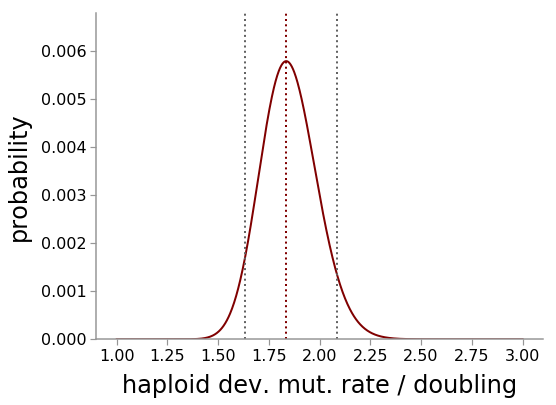

In [13]:
# Calculate the likelihood matrix and plot confidence interval 
plt.close('all')
f, ax1 = plt.subplots(1, 1, sharey=True, sharex = True, figsize=(8, 6))
# gs = matplotlib.gridspec.GridSpec(1, 2, width_ratios=[1, 1], height_ratios=[1])
# ax1 = plt.subplot(gs[0])



u_ben_min=1
u_ben_max=3

mut_list=np.linspace(u_ben_min, u_ben_max, 1000)

#MLE for increased mutation rate

squared_distance_cumulative_dev = np.array([squared_distance_calculation_dev_cumulative_weightedbyerror_with_cutoff_one_par\
                                            ([mut], VAF_info_syn_cumulative, number_of_individuals, log_phi, trimmed_lmax, n_bins_above_phi) for mut in mut_list])



logProbs_dev = (-squared_distance_cumulative_dev)
max_x= np.unravel_index(np.argmax(logProbs_dev), logProbs_dev.shape)
z_max = logProbs_dev[max_x]
z1_dev = np.exp(logProbs_dev-(z_max))
z1_dev_normalized= z1_dev/sum(z1_dev)
print('z1_dev_normalized normalized to:', sum(z1_dev_normalized))


mg_mut = np.meshgrid(mut_list)
ax1, min_s, max_s = confidence_interval_95_dev(mut_list, z1_dev_normalized, 'maroon')

# # x_major_ticks=[  1*10**-6, 2*10**-6,  3*10**-6, 4*10**-6, 5*10**-6,  6*10**-6, 7*10**-6, 8*10**-6,  9*10**-6, 10*10**-6]
# x_major_ticks=[  1*10**-7, 2*10**-7,  3*10**-7, 4*10**-7, 5*10**-7,  6*10**-7, 7*10**-7, 8*10**-7,  9*10**-7, 10*10**-7, 11*10**-7, 12*10**-7, 13*10**-7, 14*10**-7, 15*10**-7]
# x_major_tick_labels=[ '1', '2', '3', '4','5','6','7','8','9', '10', '11', '12', '13', '14', '15']
# ax1.set_xticks(x_major_ticks)
# ax1.set_xticklabels(x_major_tick_labels)

# Axis labels
ax1.set_xlabel('haploid dev. mut. rate / doubling', fontsize = 24, labelpad = 10, fontweight = 'medium')
ax1.set_ylabel('probability', fontsize = 24, labelpad = 10, fontweight = 'medium')

ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6, labelsize = 16, top = False, labeltop = False)
ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6, labelsize = 16)


# ax1.set_title("$\phi={%s}$" % round(phi,3), fontsize = 24)
# plt.savefig('Lee_six_dev_phi_2percentVAF.pdf', bbox_inches='tight')
plt.show()
# inferred_u_ben_95CIupper=8.409909909909911e-07
# inferred_u_ben_95CIlower=3.0750750750750756e-07


# Plot data

Plot the clone size statistics of synonymous variants and estimate the neutral mutation rates with the singletons/doubletons, taking into account sampling problems. Observe if the CSS shows deviation possibly due to local effects or genetic hitchhiking

phi: 0.02
phi: 1.83526611328125


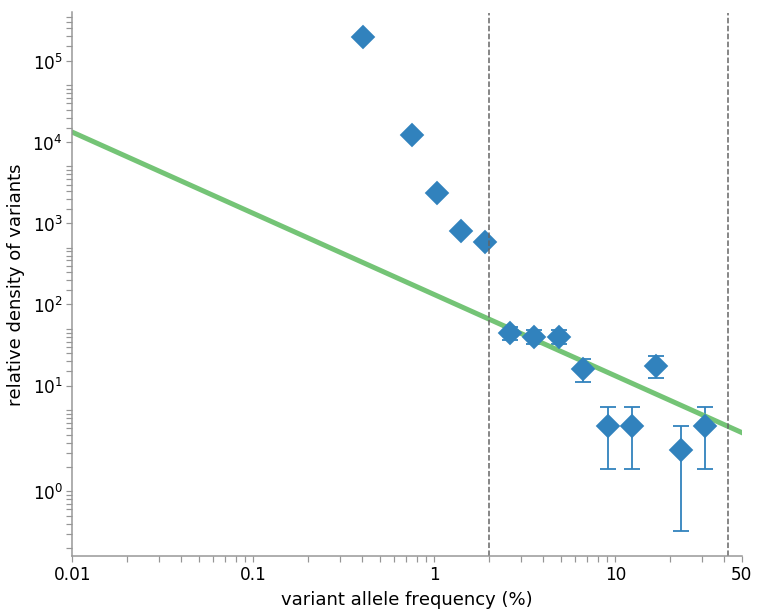

In [24]:
# Plot figure 1
i=0

plt.clf()
plt.close('all')
f, ax1 = plt.subplots(1,1, figsize=(12,10))
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)
f.subplots_adjust(hspace=0.4)

print('phi:', phi_vector[i])
print('phi:', inferred_u_dev_vector[i])
phi=phi_vector[i]
u_dev = inferred_u_dev_vector[i]
log_phi=np.log(phi)

#log binning : same bins and limits in the same simulation with same alpha
plot_log_hist_data_for_plot(hitchhikers_syn_VAF_above_phi, number_of_individuals, n_bins, trimmed_lmin, trimmed_lmax, '', 'D', 15, blue4, 1.2, 0)


trimmed_fmin=np.exp(trimmed_lmin)
trimmed_fmax=np.exp(trimmed_lmax)

linear_VAF=np.array(np.linspace(10**-4, 0.5, 1000))
log_VAF=np.array(np.linspace(np.log(10**-4), np.log(0.5), 1000))

# ax1.axvline(x=log_phi, color=grey2, zorder = 0, lw=5, linestyle='--', label="$\phi={%s}$" % round(phi,5))

density_dev_log=[logProbtheory_ages_dev(l, u_dev) for l in log_VAF]
ax1.plot(log_VAF, density_dev_log, zorder=0, color=green3, lw=5, label="haploid mut. rate$={%s}$" % round(u_dev,2))

# ax1.legend(bbox_to_anchor=(0.55, 0.25), frameon=0, fontsize= 18)

ax1.axvline(x=log_phi, color =grey4, linestyle='--')
ax1.axvline(x=l_max_rcum, color =grey4, linestyle='--')

# plt.savefig('LeeSix_dev_estimate_phi_2percent.pdf', bbox_inches='tight')
